<a href="https://colab.research.google.com/github/samiksha-nehe/honours/blob/main/Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/sample_data/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset=df.values


In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
x = dataset[:,0:10]
y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3, random_state=0)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (306, 10) (132, 10) (1022,) (306,) (132,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',

loss='binary_crossentropy',
metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6984 - accuracy: 0.4442 - val_loss: 0.6965 - val_accuracy: 0.4248
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4755 - val_loss: 0.6931 - val_accuracy: 0.5261
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5421 - val_loss: 0.6902 - val_accuracy: 0.5882
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5519 - val_loss: 0.6876 - val_accuracy: 0.5948
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5616 - val_loss: 0.6853 - val_accuracy: 0.6111
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5900 - val_loss: 0.6830 - val_accuracy: 0.6144
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5910 - val_loss: 0.6809 - val_accuracy: 0.6307
Epoch 8/100
3

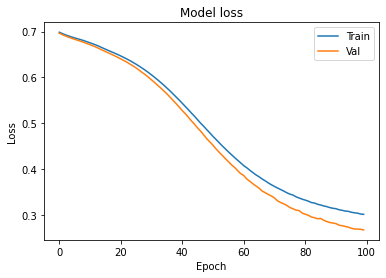

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

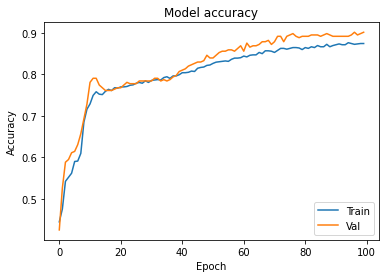

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
model_2 = Sequential([
Dense(1000, activation='relu', input_shape=(10,)),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1000, activation='relu'),
Dense(1, activation='sigmoid'),
])

In [19]:
model_2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [20]:
hist_2 = model_2.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 0.4825 - accuracy: 0.7808 - val_loss: 0.3753 - val_accuracy: 0.8301
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3759 - accuracy: 0.8366 - val_loss: 0.2739 - val_accuracy: 0.8954
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3613 - accuracy: 0.8474 - val_loss: 0.2767 - val_accuracy: 0.8987
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2908 - accuracy: 0.8738 - val_loss: 0.2638 - val_accuracy: 0.9085
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2846 - accuracy: 0.8845 - val_loss: 0.2725 - val_accuracy: 0.8987
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2698 - accuracy: 0.8943 - val_loss: 0.2438 - val_accuracy: 0.9085
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2666 - accuracy: 0.8816 - val_loss: 0.2317 - val_accuracy: 0.9052
Epoch 

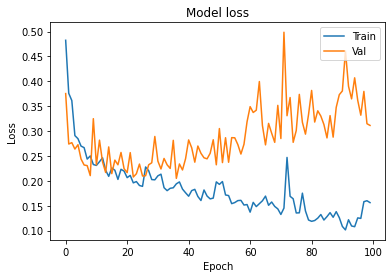

In [21]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

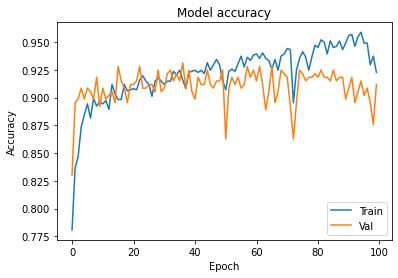

In [22]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
from keras.layers import Dropout
from keras import regularizers

In [24]:
model_3 = Sequential([
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [25]:
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [26]:
hist_3 = model_3.fit(X_train, Y_train,
batch_size=32, epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 61ms/step - loss: 14.2422 - accuracy: 0.5832 - val_loss: 3.8988 - val_accuracy: 0.8725
Epoch 2/100
32/32 [==============================] - 2s 62ms/step - loss: 1.7122 - accuracy: 0.7926 - val_loss: 0.6614 - val_accuracy: 0.8595
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 0.5656 - accuracy: 0.8464 - val_loss: 0.4635 - val_accuracy: 0.8987
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.5245 - accuracy: 0.8503 - val_loss: 0.4512 - val_accuracy: 0.9020
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4938 - accuracy: 0.8552 - val_loss: 0.4413 - val_accuracy: 0.8954
Epoch 6/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4856 - accuracy: 0.8620 - val_loss: 0.4353 - val_accuracy: 0.8987
Epoch 7/100
32/32 [==============================] - 2s 57ms/step - loss: 0.4898 - accuracy: 0.8591 - val_loss: 0.4242 - val_accuracy: 0.9052
Epoch

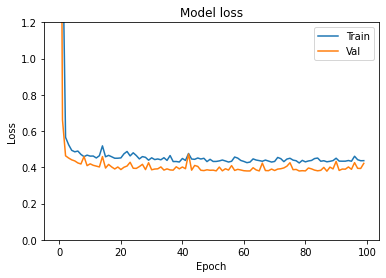

In [27]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

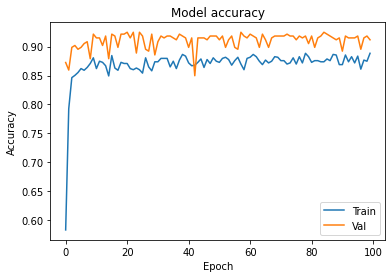

In [28]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()